# 7-7. 프로젝트: 인물 모드 문제점 찾기

## Step 1. 인물모드 직접 해 보기 

### 셀카로 셸로우 포커스 만들기

In [1]:
import os
import urllib # urllib은 웹에서 데이터를 다운로드 할때 이용한다
import cv2    # OpenCV 라이브러리로 이미지를 처리하기 위해 필요
import numpy as np
from pixellib.semantic import semantic_segmentation # 시맨틱 세그멘테이션을 편하게 사용할 수 있는 라이브러리
from matplotlib import pyplot as plt

(886, 886, 3)


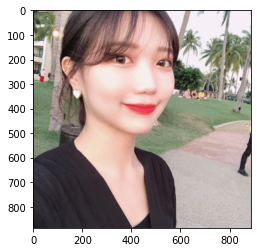

In [2]:
# 준비한 이미지 불러오기 
img_path = os.getenv('HOME')+'/aiffel/human_segmentation/images/my_image.jpeg'  
img_orig = cv2.imread(img_path) 

print(img_orig.shape)
plt.imshow(cv2.cvtColor(img_orig, cv2.COLOR_BGR2RGB))
plt.show()

In [3]:
# PixelLib에서 제공해 주는 모델 다운로드

# 저장할 파일 이름 결정
model_dir = os.getenv('HOME')+'/aiffel/repo/ex7/models'
model_file = os.path.join(model_dir, 'deeplabv3_xception_tf_dim_ordering_tf_kernels.h5')

# PixelLib가 제공하는 모델의 url
model_url = 'https://github.com/ayoolaolafenwa/PixelLib/releases/download/1.1/deeplabv3_xception_tf_dim_ordering_tf_kernels.h5'

# 다운로드 ㄱㄱ
urllib.request.urlretrieve(model_url, model_file)

('/aiffel/aiffel/repo/ex7/models/deeplabv3_xception_tf_dim_ordering_tf_kernels.h5',
 <http.client.HTTPMessage at 0x7f46eca7c550>)

In [4]:
# 다운받은 모델로 세그멘테이션 모델 생성
model = semantic_segmentation()
model.load_pascalvoc_model(model_file)

In [5]:
# 모델에 이미지 입력
segvalues, output = model.segmentAsPascalvoc(img_path) # PASCAL VOC 데이터로 학습된 모델을 이용한다는 의미

## 프로젝트용으로 코드 옮기다가 여기서 오류가 나서 당황,,,, 다른 창에서 열려 있으니까 안돼서 당황했는데 그거 셧다운하고 이거 돌리니까 된당

In [6]:
# PASCAL VOC 데이터의 라벨 종류
LABEL_NAMES = [
    'background', 'aeroplane', 'bicycle', 'bird', 'boat', 'bottle', 'bus',
    'car', 'cat', 'chair', 'cow', 'diningtable', 'dog', 'horse', 'motorbike',
    'person', 'pottedplant', 'sheep', 'sofa', 'train', 'tv'
]

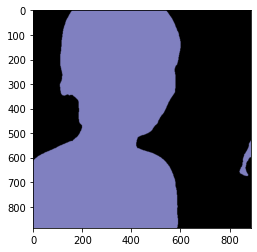

In [7]:
plt.imshow(output) # output = 모델에서 나온 출력값
plt.show()

In [8]:
segvalues

{'class_ids': array([ 0, 15]),
 'masks': array([[False, False, False, ..., False, False, False],
        [False, False, False, ..., False, False, False],
        [False, False, False, ..., False, False, False],
        ...,
        [ True,  True,  True, ..., False, False, False],
        [ True,  True,  True, ..., False, False, False],
        [ True,  True,  True, ..., False, False, False]])}

In [9]:
# PixelLib에서 그대로 가져온 코드, 주목해야 할 것은 생상 코드 결과물

colormap = np.zeros((256, 3), dtype = int)
ind = np.arange(256, dtype=int)

for shift in reversed(range(8)):
    for channel in range(3):
        colormap[:, channel] |= ((ind >> channel) & 1) << shift
    ind >>= 3

colormap[:20]

array([[  0,   0,   0],
       [128,   0,   0],
       [  0, 128,   0],
       [128, 128,   0],
       [  0,   0, 128],
       [128,   0, 128],
       [  0, 128, 128],
       [128, 128, 128],
       [ 64,   0,   0],
       [192,   0,   0],
       [ 64, 128,   0],
       [192, 128,   0],
       [ 64,   0, 128],
       [192,   0, 128],
       [ 64, 128, 128],
       [192, 128, 128],
       [  0,  64,   0],
       [128,  64,   0],
       [  0, 192,   0],
       [128, 192,   0]])

In [10]:
# 사람을 나타내는 15번째 색상
colormap[15]

array([192, 128, 128])

In [11]:
# 컬러맵 순서 바꾸기
seg_color = (128,128,192)

(886, 886)


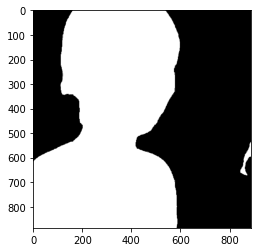

In [12]:
# output의 픽셀 별로 색상이 seg_color와 같다면 1(True), 다르다면 0(False)
seg_map = np.all(output==seg_color, axis=-1)
print(seg_map.shape)
plt.imshow(seg_map, cmap='gray')
plt.show()

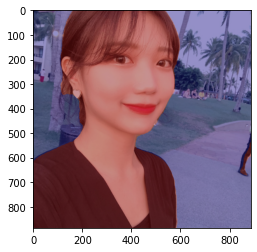

In [13]:
# 원래 이미지와 겹쳐 보며 비교해보자
img_show = img_orig.copy()

# True과 False인 값을 각각 255과 0으로 변경
img_mask = seg_map.astype(np.uint8) * 255

# 255와 0을 적당한 색상으로
color_mask = cv2.applyColorMap(img_mask, cv2.COLORMAP_JET)

# 원본 이미지와 마스트를 적당히 합친다
# 0.6과 0.4는 두 이미지를 섞는 비율
img_show = cv2.addWeighted(img_show, 0.6, color_mask, 0.4, 0.0)

plt.imshow(cv2.cvtColor(img_show, cv2.COLOR_BGR2RGB))
plt.show()

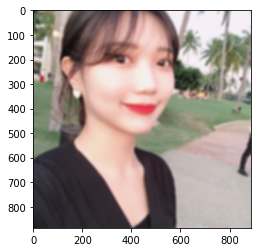

In [14]:
# blur() 함수로 배경 흐리게 만들기

img_orig_blur = cv2.blur(img_orig, (13,13))  # (13,13) = blurring kernel size
plt.imshow(cv2.cvtColor(img_orig_blur, cv2.COLOR_BGR2RGB))
plt.show()

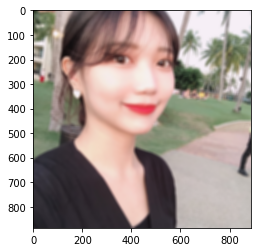

In [15]:
img_orig_blur = cv2.blur(img_orig, (14,14))  # 14로 바꾸니까 더 흐려짐
plt.imshow(cv2.cvtColor(img_orig_blur, cv2.COLOR_BGR2RGB))
plt.show()

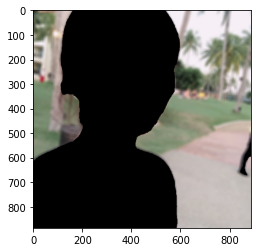

In [16]:
# 흐려진 이미지에서 세그멘테이션 마스크로 배경만 추출

img_mask_color = cv2.cvtColor(img_mask, cv2.COLOR_GRAY2BGR)
img_bg_mask = cv2.bitwise_not(img_mask_color)
img_bg_blur = cv2.bitwise_and(img_orig_blur, img_bg_mask)
plt.imshow(cv2.cvtColor(img_bg_blur, cv2.COLOR_BGR2RGB))
plt.show()

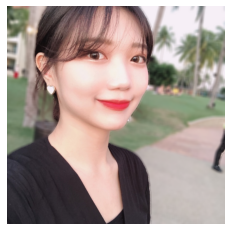

In [17]:
# 블러된 배경이랑 사람을 합치면 끝 !

img_concat_1 = np.where(img_mask_color==255, img_orig, img_bg_blur)
plt.imshow(cv2.cvtColor(img_concat_1, cv2.COLOR_BGR2RGB))
plt.axis("off") # 축 없애기

plt.show()

### 고양이 대신 강아지로 해서 셸로우 포커스 만들기
친구집 강아지 사진이 있길래 가져왔당

(750, 750, 3)


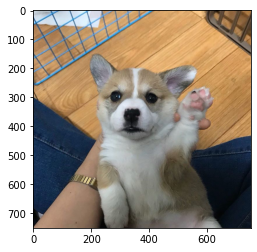

In [18]:
# 강아지 이미지 불러오기 
img_path = os.getenv('HOME')+'/aiffel/human_segmentation/images/my_dog.jpeg'  
img_orig = cv2.imread(img_path)

print(img_orig.shape)
plt.imshow(cv2.cvtColor(img_orig, cv2.COLOR_BGR2RGB))
plt.show()

In [19]:
# 모델에 이미지 입력
segvalues, output = model.segmentAsPascalvoc(img_path) # PASCAL VOC 데이터로 학습된 모델을 이용한다는 의미

# PASCAL VOC 데이터의 라벨 종류
LABEL_NAMES = [
    'background', 'aeroplane', 'bicycle', 'bird', 'boat', 'bottle', 'bus',
    'car', 'cat', 'chair', 'cow', 'diningtable', 'dog', 'horse', 'motorbike', # dog = 12
    'person', 'pottedplant', 'sheep', 'sofa', 'train', 'tv'
]

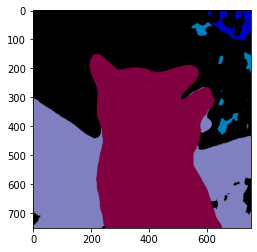

In [20]:
plt.imshow(output) # output = 모델에서 나온 출력값
plt.show()

In [21]:
segvalues

{'class_ids': array([ 0,  9, 11, 12, 15]),
 'masks': array([[False, False, False, ..., False, False, False],
        [False, False, False, ..., False, False, False],
        [False, False, False, ..., False, False, False],
        ...,
        [ True,  True,  True, ...,  True,  True,  True],
        [False,  True,  True, ...,  True,  True,  True],
        [False,  True,  True, ...,  True,  True,  True]])}

In [22]:
# dog인 12를 넣어봤다
colormap[12]

array([ 64,   0, 128])

In [23]:
# 컬러맵 순서 바꾸기
seg_color = (128,0,64)

(750, 750)


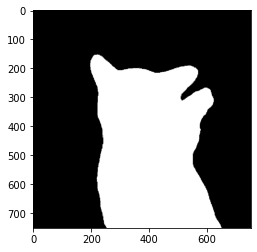

In [24]:
#seg_color로만 이루어진 컬러맵
# output의 픽셀 별로 색상이 seg_color와 같다면 1(True), 다르다면 0(False)
seg_map = np.all(output==seg_color, axis=-1)
print(seg_map.shape)
plt.imshow(seg_map, cmap='gray')
plt.show()

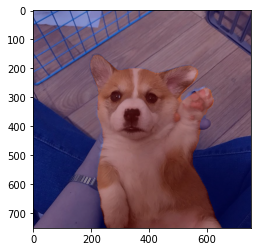

In [25]:
# 원래 이미지와 겹쳐 보며 비교해보자
img_show = img_orig.copy()

# True과 False인 값을 각각 255과 0으로 변경
img_mask = seg_map.astype(np.uint8) * 255

# 255와 0을 적당한 색상으로
color_mask = cv2.applyColorMap(img_mask, cv2.COLORMAP_JET)

# 원본 이미지와 마스트를 적당히 합친다
# 0.6과 0.4는 두 이미지를 섞는 비율
img_show = cv2.addWeighted(img_show, 0.6, color_mask, 0.4, 0.0)

plt.imshow(cv2.cvtColor(img_show, cv2.COLOR_BGR2RGB))
plt.show()

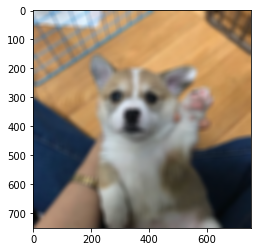

In [26]:
# blur() 함수로 배경 흐리게 만들기

img_orig_blur = cv2.blur(img_orig, (20,20))  # 이번엔 20, 20 으로 더 쎄게 해봤다
plt.imshow(cv2.cvtColor(img_orig_blur, cv2.COLOR_BGR2RGB))
plt.show()

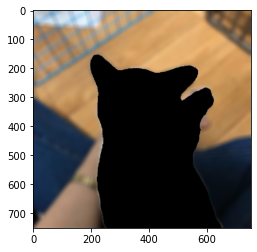

In [27]:
# 흐려진 이미지에서 세그멘테이션 마스크로 배경만 추출

img_mask_color = cv2.cvtColor(img_mask, cv2.COLOR_GRAY2BGR)
img_bg_mask = cv2.bitwise_not(img_mask_color)
img_bg_blur = cv2.bitwise_and(img_orig_blur, img_bg_mask)
plt.imshow(cv2.cvtColor(img_bg_blur, cv2.COLOR_BGR2RGB))
plt.show()

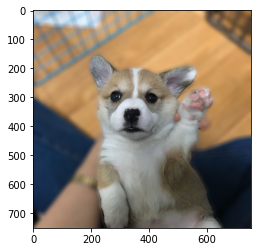

In [28]:
# 배경과 사람을 합치면 끝! 오봉아 안뇽?

img_concat = np.where(img_mask_color==255, img_orig, img_bg_blur)
plt.imshow(cv2.cvtColor(img_concat, cv2.COLOR_BGR2RGB))
plt.show()

### 배경전환 크로마키 사진을 만들어보자

(460, 690, 3)


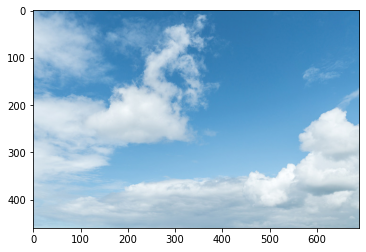

In [29]:
# 배경사진 이미지 불러오기 (사진은 구글링으로 찾음)
img_path = os.getenv('HOME')+'/aiffel/human_segmentation/images/background.jpeg'  
img_bg = cv2.imread(img_path)
print(img_bg.shape) ## shape 확인해서 사진이랑 같은 크기로 맞춰줘야 한다

plt.imshow(cv2.cvtColor(img_bg, cv2.COLOR_BGR2RGB))
plt.show()

배경사진 이미지를 맞춰주자
(460,690,3) -> (750,750,3)

In [30]:
img_bg = cv2.resize(img_bg, dsize=(750, 750), interpolation=cv2.INTER_AREA)
print(img_bg.shape)

(750, 750, 3)


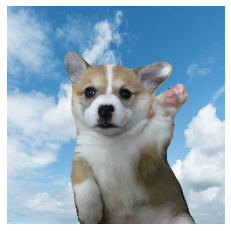

In [31]:
# 배경이랑 마스크 합쳐주면 꿑! 
img_concat = np.where(img_mask_color==255, img_orig, img_bg)
plt.imshow(cv2.cvtColor(img_concat, cv2.COLOR_BGR2RGB))
plt.axis("off") # 축 없애기

plt.show()

## Step 2. 사진에서 문제점 찾기

In [32]:
import matplotlib.image as mpimg

img_dir = os.getenv('HOME') + '/aiffel/human_segmentation/images'
img1 = mpimg.imread(img_dir + '/pb1.png')
img2 = mpimg.imread(img_dir + '/pb3.png')
img3 = mpimg.imread(img_dir + '/pb2.png')

### problem 1. 사람 다리가 일부 인식됨

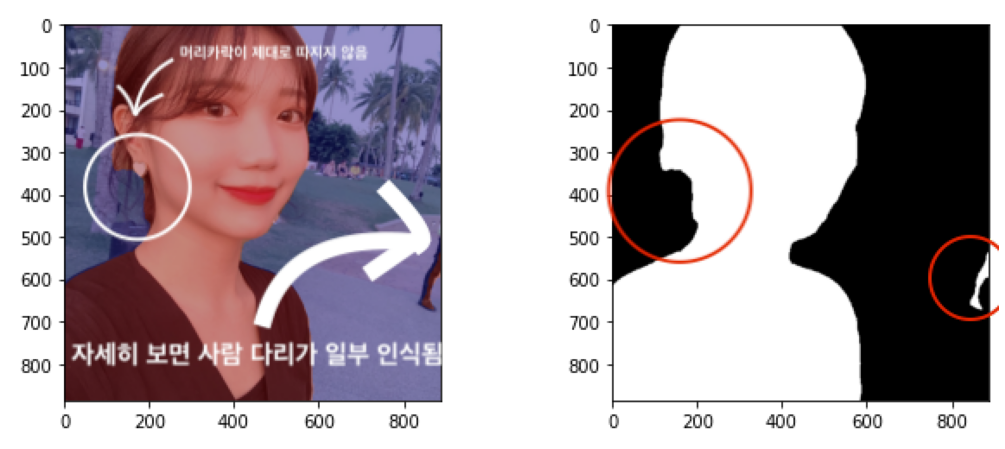

In [33]:
import matplotlib.image as mpimg

img_dir = os.getenv('HOME') + '/aiffel/human_segmentation/images'

fig = plt.figure(figsize = (18, 8))
rows = 1
cols = 2

ax1 = fig.add_subplot(rows, cols, 1)
ax1.imshow(img1)
ax1.axis("off")

ax2 = fig.add_subplot(rows, cols, 2)
ax2.imshow(img2)
ax2.axis("off")

plt.show()

- 사진에 우연히 걸린 지나가던 사람의 다리가 인식되었다.
- 그리고 머리카락들이 제대로 인식되지 않았다, 영역이 매끄럽게 처리되지 않았다.

### problem 2. 물체의 영역이 매끄럽게 처리되지 않음

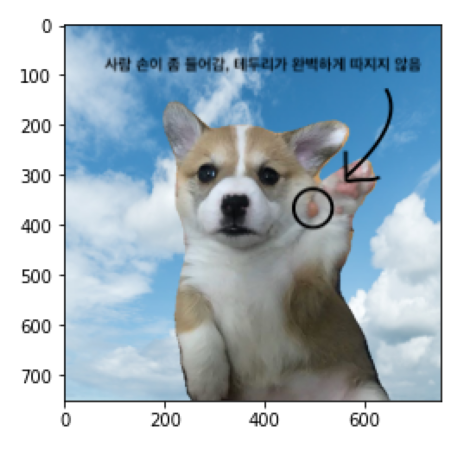

In [34]:
fig = plt.figure(figsize = (8,8))
plt.imshow(img3)
plt.axis("off")
plt.show()

- 사람의 손이 인식되었다.
- 물체의 영역이 완전 매끄럽지는 않다.

## Step 3. 해결 방법을 제안해 보기

: DeepLab 모델의 Semantic Segmentation 이 만들어 낸 Mask 영역에 어떻게 적용되어 문제점을 보완하게 되는지의 메커니즘이 포함된 솔루션을 제시

사진 두가지의 공통적인 문제점으로 분석되는 것이 명확하지 못한 물체와 배경의 경계선이다. 이를 해결하고자 렌더링을 응용한 이미지 세분화 방법인 'PointRend'에 대해 알아봤다.

기존의 세분화 방법은 입력 영상을 인코딩하고 특징량 맵으로 라벨링 한 후 디코딩으로 업 샘플링한다. 예를 들어, DeepLabV3는 디코딩 시 4배 업샘플링을 2회 실시하기 위해, 16배로 업샘플링을 한다. 그러나 세그멘테이션은 픽셀 단위로 세분화하는 작업이기 때문에 한 번에 대량의 업샘플링을 수행하면 분류 정확도가 떨어지게 되고, 특히 선의 얇은 경계선이 거칠어진다.

또한, 기존의 네트워크는 이미지를 균일하게 분할하고 각 픽셀에 대해 세분화하고 라벨을 붙여 나간다. 그러나 이미지에는 낮은 주파수 영역(상대적으로 매끄럽고 적은 색상의 변화)과 고주파 영역(명백한 변화, 오브젝트의 경계선)이 있는데, 저주파 영역의 경우 특정 카테고리로 분류되어 샘플링할 필요는 거의 없다. 하지만 고주파 영역의 경우 샘플링된 포인트가 드문드문 뜬다면 분류된 오브젝트의 경계는 거칠어질 가능성이 있다. 즉 오브젝트의 경계를 언더 샘플링할 때 불필요하게 매끄러운 영역을 오버 샘플링하게 될 수가 있다.

Facebook이 제안하는 'PointRend'는 특징량 맵의 픽셀 값의 분포에 따라 계산 대상을 선택하는 샘플링의 밀도를 바꾸는 것으로, 필요한 픽셀로 필요한 계산을 하고 미세한 조정이 가능하다. 상세한 라벨링으로 테두리의 분류 정확도가 높아진다. 또한 선택적으로 계산하는 기존 방식에 비해 계산 효율도 높아진다고 한다. Mask R-CNN 등의 일반적인 인스턴스 세분화 메타 아키텍처와 FCN 등의 시멘틱 세분화 메타 아키텍처에 통합할 수도 있어 폭넓은 응용이 가능하다.

PointRend는 3개의 모듈로 구성되어 있다.

1. Point Selection Strategy
 - 몇 개의 포인트를 선택하여 예측하는 것으로, 고해상도로 변환한 후의 계산량을 제한하여 계산량을 억제함
2. Point-wise Feature Representation
 - 선택된 포인트마다 바이 리니어(Bi-Linear) 보간법을 이용하여 특징량을 추출
3. Point Head
 - 포인트마다 추출된 특징량으로부터 라벨을 예측하도록 학습한 소형 신경망
 
참고 : https://doooob.tistory.com/79, https://arxiv.org/abs/1912.08193